In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [37]:
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

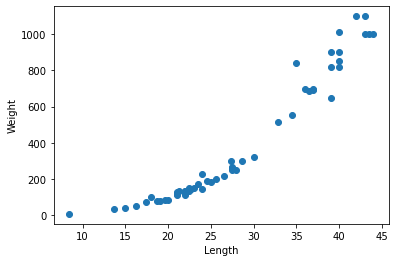

In [38]:
plt.scatter(perch_length, perch_weight)

plt.xlabel("Length")
plt.ylabel("Weight")

plt.show()

In [39]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42)

train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [40]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors = 3)
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [41]:
print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))

0.9804899950518966
0.9746459963987609


In [42]:
knr.predict([[50]])

array([1033.33333333])

In [43]:
dist, indx = knr.kneighbors([[50]])
print(indx)

[[34  8 14]]


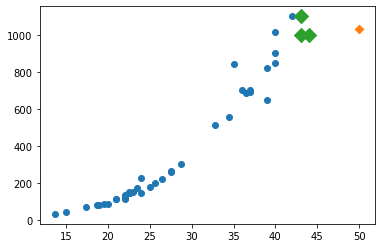

In [44]:
plt.scatter(train_input, train_target)
plt.scatter(50, 1033, marker='D')
plt.scatter(train_input[indx], train_target[indx], marker = "D", s = 100 )
plt.show()

In [45]:
## 선형회귀

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
lr = LinearRegression()
lr.fit(train_input, train_target)

LinearRegression()

In [48]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.939846333997604
0.8247503123313558


In [49]:
lr.predict([[50]])


array([1241.83860323])

In [50]:
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


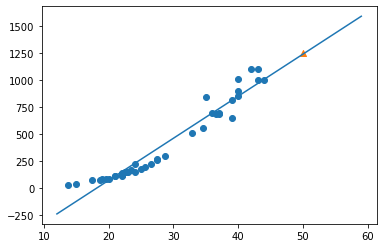

In [51]:
x_new = np.arange(12, 60)
y_new = x_new*lr.coef_ + lr.intercept_

plt.scatter(train_input, train_target)
plt.scatter(50, 1252, marker = "^")
plt.plot(x_new, y_new)

plt.show()

In [55]:
train_input[:10]
# print(train_input.shape)

train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))
# train_poly[:10]

test_poly[:10]

array([[  70.56,    8.4 ],
       [ 324.  ,   18.  ],
       [ 756.25,   27.5 ],
       [ 453.69,   21.3 ],
       [ 506.25,   22.5 ],
       [1600.  ,   40.  ],
       [ 900.  ,   30.  ],
       [ 605.16,   24.6 ],
       [1521.  ,   39.  ],
       [ 441.  ,   21.  ]])

In [57]:
lrp = LinearRegression()
lrp.fit(train_poly, train_target)

LinearRegression()

In [58]:
print(lrp.coef_, lrp.intercept_)

[  1.01433211 -21.55792498] 116.05021078278259


In [60]:
print(lrp.score(train_poly, train_target))
print(lrp.score(test_poly, test_target))

0.9706807451768623
0.9775935108325121


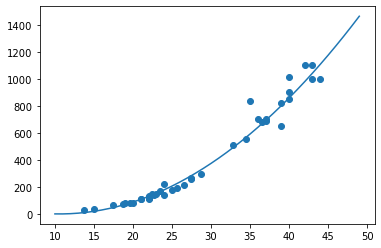

In [62]:
x_new = np.arange(10, 50)
y_new = 112.14 - 20.93 *x_new + 0.99*x_new**2
plt.scatter(train_input, train_target)
plt.plot(x_new, y_new)

plt.show()